## 项目提交
>
- wrangle_act.ipynb：用于收集、评估、清洗、分析和可视化数据的代码 (y)
- wrangle_report.pdf：汇总数据整理步骤的文档：收集，评估和清洗
- act_report.pdf：对最终数据进行观察与分析的文档
- twitter_archive_enhanced.csv：给定的文件 (y)  【* WeRateDogs 的推特档案】
- image_predictions.tsv：以编程方式下载的文件 (y) 【已下载】
- tweet_json.txt：通过 API 构建的文件 (y) 【已经提供】
- twitter_archive_master.csv：合并与清洗后的数据 (y)
- 其他附加文件（例如，用于存储干净数据的附加文件或数据库文件）(y) 【图片dog3.jpg】
>

In [2]:
import json
import pandas as pd
import numpy as np
import requests
import os
import re

#### 获取三个表格

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# image_url = ['https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv']
# for url in image_url:
#     response = requests.get(url)
#     with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
#         file.write(response.content)
image = pd.read_csv('image-predictions.tsv',sep='\t')

### `修改一`

#### 修改原因：全部读取json文件后再提取3个列，不够简洁。


#### 原来的代码如下

In [4]:
# data = []
# with open('tweet_json.txt') as f:
#     for line in f:
#         data.append(json.loads(line))

# add_data = pd.DataFrame(data)

#### 改进代码：直接用read_json()函数获取所需的3个列。

In [5]:
df_json = pd.read_json('tweet_json.txt',lines=True)[['id', 'retweet_count', 'favorite_count']]
df_json.columns = ['tweet_id', 'retweet_count', 'favorite_count']

#### 查看各表格存在的问题

In [6]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


#### 由于archive是主要文件，先看archive这个文件的内容。

另外两个是附加文件，而且暂时没有什么大问题，就算有问题也需要等到清理的时候才能发现。

#### 注：此处主要展示有问题的几列，为了篇幅简洁，主次分明，其他细节过程就不展示了。

In [9]:
# timestamp数据类型是字符型，应该是时间型
archive.timestamp.sample()

2322    2015-11-17 01:40:41 +0000
Name: timestamp, dtype: object

In [10]:
# 评分的分母存在170，2等不合理的值
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
# 很明显，姓名有None,a, an等不合理的值
archive.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Bo               9
Winston          9
the              8
Sadie            8
an               7
Bailey           7
Toby             7
Daisy            7
Buddy            7
Leo              6
Koda             6
Rusty            6
Scout            6
Milo             6
Stanley          6
Oscar            6
Dave             6
Jack             6
Jax              6
Bella            6
Larry            5
              ... 
Lorelei          1
Jazz             1
Colin            1
Biden            1
Pete             1
Jeffri           1
Ralphé           1
Florence         1
Cheryl           1
Oreo             1
Miguel           1
Carper           1
Caryl            1
Eriq             1
Anthony          1
Evy              1
Ito              1
infuriating      1
Strudel          1
Brat             1
Robin            1
Laika       

In [12]:
# 批量查看宠物狗地位的数据情况
list_dog = ['doggo','puppo','floofer','pupper']
for i in list_dog:
    j = archive[i].value_counts()
    print(j)

None     2259
doggo      97
Name: doggo, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64


### `修改二`

#### 修改原因： 
1. 查看text 显示不全，不方便去 text 原文中检查当前数据集中的 name、地位、评分等是否与原推文对应。
2. 多次用for循环，不如用apply()函数。
3. 没有展示分子列的检查情况，提取评分的正则表达式没有覆盖到带小数点的浮点型数字。


#### 原来的代码如下

In [13]:
# 用str.findall()来获取所有情况
# archi.rate= archi.text.str.findall('(\d+\/\d+)')
# archi.name = archi.text.str.findall('[^th](?:is|was|named|Meet|to|and|have|will|would|be|can|could|may|that)\s([A-Z][a-z].*?(?=\.))')
# archi.stage = archi.text.str.findall('(doggo|floofer|puppo|pupper)')

In [14]:
# 定义查看多值的函数
# def find_multiple_value(data):
#     for key,value in enumerate(data):
#         if len(value) > 1:
#             text = archi.text[key]
#             print(key,value,text)

In [15]:
# 查看含有多个分数值的原文
# find_multiple_value(archi.rate)

In [16]:
# 查看含有多个姓名数据的原文
# find_multiple_value(archi.name)

In [17]:
# 查看含有多个地位数据的原文
# find_multiple_value(archi.stage)

#### 改进代码：
1. 修改text查看范围；
2. 将for循环修改为apply;
3. 增加分子列的查看，修改正则表达式，以查看9.75这种浮点数的分子正则表达式

In [18]:
# 评分/姓名/地位部分比较复杂，保险起见，先备份一份
archi = archive.copy()

In [19]:
# 查看异常分子分母对应的text
pd.set_option('max_colwidth',200)
archi.query('rating_denominator!=10 | rating_numerator > 20')[['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10
290,@markhoppus 182/10,182,10
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10


In [20]:
# 查看多个评分对应的text
archi['scores'] = archi.text.str.findall('((?:\d+\.)?\d+\/\d+)')
archi['score_counts'] = archi['scores'].apply(lambda x: len(set(x)))
archi.query('score_counts>1')[['text','scores','score_counts']]

,text,scores,score_counts
55,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,"[17/10, 13/10]",2
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho","[960/00, 13/10]",2
561,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","[12/10, 11/10]",2
766,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ","[12/10, 11/10]",2
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…","[9/11, 14/10]",2
860,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,"[8/10, 11/10]",2
1007,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,"[10/10, 7/10]",2
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","[9/11, 14/10]",2
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,"[4/20, 13/10]",2
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,"[50/50, 11/10]",2


#### 注：姓名和地位部分在text中的异常情况将在清理部分展示

## 数据存在的问题

### 质量

##### 1. 有效性

- 存在非tweet网站的原始数据，从其他网站转发到tweet的数据不能用。【修改为：存在不符合“含有图片的原始评级（不包括转发）”的数据】

##### 2. 完整性

- archive表格中的in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls这几列，存在大量缺失值。
- archive中的name含有大量值为“None”，说明有缺失信息。
- 小狗的地位数据含大量缺失信息。

##### 3. 一致性

- 三张表的id列数据类型和列名称不统一。
- archive表格中的timestamp列内容是表时间，但数据类型不是时间型。

##### 4. 准确性

- name一列里有745个None，55个a，7个an，这些通常不是狗的名字。
- 根据rating_numerator和rating_dominator，再结合text原文内容发现，评分的选取存在错误，有的数据是日期如9/11、11/15/15；有的数据如960/00、3 1/2这些也不是评分。


### 整洁度

##### 定义：“不符合“每个变量构成一列，每个观察值构成一行，每个观察单元构成一个表格”
- doggo，floofer，pupper，puppo都是狗的地位，应该单独为一列。
- 很多text列中含有两个及以上的rate，name，stage数据。【删掉，因为text本身不存在问题】
- 【增加：三个图表都是以 tweet_id 为观察单元，违反了整洁度要求的最后一条 “Each type of observational unit forms a table”，所以需要合并为一个表格。】

# 清理数据

### 1.删除转发数据

In [21]:
index = archive.index[archive.retweeted_status_timestamp.notnull()]
for i in index:
    archive.drop(i,inplace = True)

In [22]:
# 检查是否被删掉
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [23]:
# archive[archive['text'].str.contains('http://t.co/cLyzpcUcMX')[['text']]

### 修改三

#### 修改原因：没有提前合并数据，因为合并数据后，就清理掉了没有图片的数据

#### 新增代码如下

### 2.  合并三份数据

In [24]:
archive1 = pd.merge(archive,df_json,on=["tweet_id"],how="inner" )
archive1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweet_count                 2175 non

In [25]:
archive = pd.merge(archive1,image,on=["tweet_id"],how="inner" )
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 30 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
retweet_count                 1994 non

### 4.删除含有大量缺失值的列

In [26]:
archive.drop(['in_reply_to_status_id','in_reply_to_user_id',
            'retweeted_status_id','retweeted_status_user_id',
            'retweeted_status_timestamp'], axis=1, inplace=True)

In [27]:
#检查缺失列是否被删除
archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null floa

### 3.更改timestamp列数据类型

In [28]:
archive.timestamp = pd.to_datetime(archive.timestamp)

In [29]:
#检查数据类型
archive.timestamp.sample(1).dtype

datetime64[ns, UTC]

### 5.评分/姓名/地位的多值问题：


根据text列（附加expanded_urls列）找到原文后发现，同一条推特里存在多个评分、姓名、地位的数据。这样的情况通常是因为：

1. 同一条推特里提到了两个及以上的描述对象，即多只宠物狗，因此这条推特里就含有两个及以上的评分/姓名/地位；

2. 还有一种情况是，可能真正有效的评分/姓名/地位其实只有一个值。

例如：

>评分例子："Meet Eve. She's a raging alcoholic 8/10 (would be 11/10 but pupper alcoholism is a tragic issue that I can't condone)"

> 姓名例子："This is Cermet, Paesh, and Morple. They are absolute h*ckin superstars. 14/10 for all"

> 地位例子："He's a sophisticated doggo. Also pointier than your average pupper"

### 解决思路：

为了数据的整洁度，我决定每条推特只取一个评分/姓名/地位的值。【修改为：...stage保留所有的值】

分析原文内容，例如：

- 评分例子中，8/10是有效的评分，11/10是虚拟语气的表达，相对无效。
- 姓名例子中，14/10是对Cermet, Paesh, and Morple这三只狗的整体评分。任取一个姓名都有效。
- 地位例子中，doggo是对主要描述对象的地位评价，而pupper对应的是其它对象。

所以，大部分情况下，每条推特的`第一个`评分/姓名/地位值相对更有效。


因为findall()提取的是列表，而大多数评分/姓名只有一个值，我需要从大量列表里取出那单个值，这样步序繁琐而且比较耗时。

#### 所以最后用str.extract()获取每条推特text中的第一个分数/姓名。

#### 然后再筛选出异常值及其索引，根据索引重新到text里找出第二个替代值。


### `二次修改（3）`【（1）（2）在后面】

#### 修改原因： 忽略了`“stage 原本的四列数据中就记录了多个值的情况”`

#### 修改为：关于地位数据的多值情况，一是因为地位数据不参与量化计算，保留所有值是合理的；二是原表格中就存在多值，因此以原表格为主。

### 5.1 处理评分问题

In [30]:
archi = archive.copy()

In [31]:
# 用str.extract()获取每条推特text中的第一个分数
archi['rate']= archi.text.str.extract('((?:\d+\.)?\d+\/\d+).*')

In [32]:
# 检查含小数点的分数是否被提取
archi[archi['rate']=='9.75/10']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,rate
503,786709082849828864,2016-10-13 23:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",https://twitter.com/dog_rates/status/786709082849828864/photo/1,75,10,Logan,None,None,...,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True,9.75/10


In [33]:
# 筛选并查看分母不为10的分数，以及text中含有的所有分数
for k,v in enumerate(archi.rate):
    if not re.search('\/10',v):
        rate = re.findall('(\d+\/\d+)',archi.text[k])
        if len(rate)>1:
            print(k,v,rate)
# 从左往右分别对应：索引，第一个分数，索引对应的text中所有分数

800 9/11 ['9/11', '14/10']
891 4/20 ['4/20', '13/10']
925 50/50 ['50/50', '11/10']
1328 7/11 ['7/11', '10/10']
1973 1/2 ['1/2', '9/10']


In [34]:
# 用提取的第二个值替换前一个值
dict_alter ={}
count = 0
for k,v in enumerate(archi.rate):
    if not re.search('\/10',v):
        rate = re.findall('(\d+\/\d+)',archi.text[k])
        if len(rate)>1:
            dict_alter[k] = rate[1]
count+=1

In [35]:
dict_alter.keys()

dict_keys([800, 891, 925, 1328, 1973])

In [36]:
for k in dict_alter.keys():
    #将清理好的值赋值给评分列。
    archi.rate[k] = dict_alter[k]

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#### 注：
- 筛选处理后剩下的分母不为10的评分，但经过查看原文，发现依然合理。
- 最后将这些评分全部变成可计算的浮点型，就可以得到合理的值

In [37]:
# 转化为浮点型
num = archi.rate.str.split('/')

number = []
count=1
for i in num:
    n = float(i[0])/float(i[1])*10
    number.append(n)
count+=1  

archi.rate = number

In [38]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 

### 5.2. 整理姓名/地位数据

### 修改四

#### 修改原因：name提取不够谨慎。有些原有的名字没有被提取到

#### 原来的代码如下

In [39]:
# archi.name = archi.text.str.extract('[^th](?:is|was|named|Meet|to|and|have|will|would|be|can|could|may|that)\s([A-Z][a-z]+[áöéòó]?).*')

#### 改进代码： 给被提取的name新建一列，对比之前的name，发现问题并改进。

In [40]:
archi['new_name'] = archi.text.str.extract('(?:This is|named|Meet|hello to|name is|Here we have|Here is)\s([A-Z]+[a-záöéòó].*?(?=\.|\,|\s))')

In [41]:
# 设置新旧name任意一个不为空值的条件（1）
one_value_mask = (archi['name']!='None')|(archi['new_name'].notna())
# 设置在条件（1）下新name和原来name不一致的条件（2）
test_mask = (archi.name!= archi.new_name)&(one_value_mask)
# 展示条件（2）下的具体情况
archi.loc[test_mask,['text','name','new_name']]

,text,name,new_name
21,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,NaN
49,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,NaN
134,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,Zoey
135,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,NaN
149,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite,NaN
275,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one,NaN
397,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,None,Burke
404,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly,NaN
472,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a,NaN
561,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O,NaN


#### 由于notebook里面有折叠，检查不完全部内容，因此下面以50为单位，分块检查

In [42]:
archi.loc[test_mask,['text','name','new_name']][:50]

,text,name,new_name
21,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such,NaN
49,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a,NaN
134,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0,None,Zoey
135,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite,NaN
149,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite,NaN
275,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one,NaN
397,Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,None,Burke
404,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly,NaN
472,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,a,NaN
561,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O,NaN


In [43]:
archi.loc[test_mask,['text','name','new_name']][50:100]

,text,name,new_name
1398,Guys this really needs to stop. We've been over this way too many times. This is a giraffe. We only rate dogs.. 7/10 https://t.co/yavgkHYPOC,a,NaN
1407,This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE,officially,NaN
1441,This is a dog swinging. I really enjoyed it so I hope you all do as well. 11/10 https://t.co/Ozo9KHTRND,a,NaN
1452,This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb,the,NaN
1469,This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF,the,NaN
1503,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,a,Wylie
1504,Seriously guys?! Only send in dogs. I only rate dogs. This is a baby black bear... 11/10 https://t.co/H7kpabTfLj,a,NaN
1527,C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2,a,NaN
1528,This is a fluffy albino Bacardi Columbia mix. Excellent at the tweets. 11/10 would hug gently https://t.co/diboDRUuEI,a,NaN
1569,This is a Sagitariot Baklava mix. Loves her new hat. 11/10 radiant pup https://t.co/Bko5kFJYUU,a,NaN


In [44]:
archi.loc[test_mask,['text','name','new_name']][100:150]

,text,name,new_name
1972,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,a,NaN
1973,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,an,NaN
1983,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10 https://t.co/RhUEAloehK,the,NaN
1984,Here is the Rand Paul of retrievers folks! He's probably good at poker. Can drink beer (lol rad). 8/10 good dog https://t.co/pYAJkAe76p,the,NaN
1985,My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O,a,NaN
1986,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,a,NaN
1987,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,an,NaN
1988,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a,NaN
1990,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a,NaN
1991,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a,NaN


In [45]:
# 把new_name赋值给name
archi['name'] = archi['new_name']

### `二次修改（1）`

#### 修改原因:  stage存在的多值需要保留

#### 原来的代码如下

In [46]:
# archi['stage'] = archi.text.str.extract('(doggo|floofer|puppo|pupper).*')

### 改进代码：
1. 全部化为小写字母后，用findall()获取所有情况；
2. 用“，”连接多个值，使其共同作为stage的值。

In [47]:
# 加了个 .str.lower()，避免提取不到大小写不同的 stage
archi['stage']=archi.text.str.lower().str.findall('(doggo|pupper|puppo|floofer)')

# 对 stage 列使用 set 来去重，避免出现推文中重复某一个 stage，但是被提取多次，然后调用匿名函数，使其 join 为字符串
archi['stage'] = archi['stage'].apply(lambda x: ','.join(set(x)))

In [48]:
# 替换其中的空值为 np.nan
archi['stage'].replace('', np.nan, inplace = True)

In [49]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 28 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns, UTC]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1379 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 

In [50]:
# 删除多余列
archi.drop(['doggo','floofer','pupper','puppo','rating_numerator','rating_denominator','new_name'],axis=1,inplace = True)

In [51]:
archi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null datetime64[ns, UTC]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1379 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
rate              1994 non-null float64
stage             342 non-null object
dtypes: bool(3), datetime64[ns, UTC](1), float64(4), int64(4), objec

### 修改五
#### 修改原因：新文件里出现了Unnamed: 0

In [52]:
# archi.to_csv('twitter_archive_master.csv')
# file = pd.read_csv('twitter_archive_master.csv')
# file.info()

#### 改进代码：增加参数index=False

In [53]:
archi.to_csv('twitter_archive_master.csv',index=False)
data = pd.read_csv('twitter_archive_master.csv')
# 检查是否有问题
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id          1994 non-null int64
timestamp         1994 non-null object
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1379 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
rate              1994 non-null float64
stage             342 non-null object
dtypes: bool(3), float64(4), int64(4), object(10)
memory usage: 286.3+ KB


## 分析和可视化

### 1.整理可视化数据

### 二次修改（2）

#### 修改原因: 重新读取的时间依然是object,所以不用重新读取的文件，而使用之前清理好的文件。

#### 原来的代码如下

In [54]:
#删掉与可视化无关的数据
# pic = data.drop(['tweet_id','source','text','expanded_urls','stage'],axis = 1)
# pic.info()

#### 改进代码：将“data"改为”archi"

In [55]:
pic = archi.drop(['tweet_id','source','text','expanded_urls','stage'],axis = 1)
pic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
timestamp         1994 non-null datetime64[ns, UTC]
name              1379 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
rate              1994 non-null float64
dtypes: bool(3), datetime64[ns, UTC](1), float64(4), int64(3), object(5)
memory usage: 303.9+ KB


In [56]:
# 提取方便可视化的时间
pic['day'] = pic['timestamp'].dt.date
pic['mon'] = pic['timestamp'].dt.month
pic['year'] = pic['timestamp'].dt.year

In [57]:
#储存文件，以便单独运行可视化文件
# pic.to_csv('twitter_visual.csv')

### 2.提出问题

表格中的可以被分析的变量分为两类：定性数据（维度）和定量数据（度量）。
- 维度：姓名，地位，品种
- 度量：时间，评分，喜爱量，转发量，预测概率

因此，根据以上变量探索：
1. 最受喜爱的的宠物狗名字【文字云】
2. 评分、喜爱量、转发量随时间如何变化？【折线图】
3. 比较受欢迎的品种有哪些？【散点图】（喜爱量，转发量，月份控制大小、颜色）
4. 哪些因素可能与评分有关？【热力图】

In [3]:
# 单独可视化时再运行
# pic = pd.read_csv('twitter_visual.csv')

In [4]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from PIL import Image
from os import path
import seaborn as sns
%matplotlib inline

### 3. 进行可视化

#### 1. 最受喜爱的的宠物狗名字

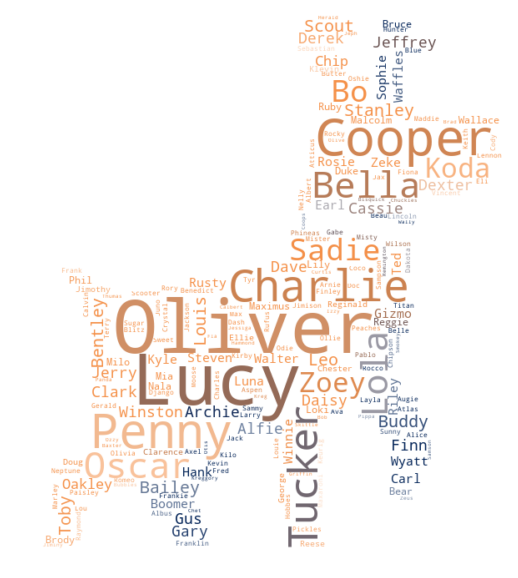

In [5]:
name=pic.name.dropna()# 去除缺失值

dogmask=np.array(Image.open('dog3.png'))
gencolor=ImageColorGenerator(dogmask)

wc_dog = WordCloud(background_color="white",collocations=False,mask=dogmask,color_func=gencolor)
wc_dog.generate(' '.join(name))

plt.figure(figsize=(10,10))
plt.imshow(wc_dog, interpolation='bilinear')
plt.axis('off')
plt.show()

可以看出: oliver, copper, lucy, penny...这些名字比较受欢迎.

#### 2. 评分、喜爱量、转发量随时间如何变化？

D:\anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


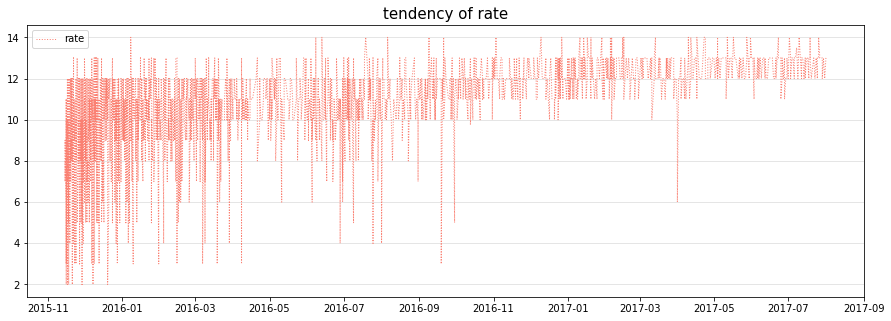

In [64]:
# 评分随时间的变化

plt.figure(figsize=(15,5))
# 去掉极端值
pic.rate = pic.rate[(pic.rate <20) &(pic.rate >1)]

plt.plot(pic.day,pic.rate,color='salmon',linewidth=1,ls=':',alpha=1)

plt.title('tendency of rate',fontsize = 15)

plt.legend(labels = ['rate'], loc = 'best')
plt.grid(axis='y',alpha= 0.4)

从图中看出, 大致在2015.11-2016.11这个时间范围内,评分数量比较密集, 分数波动比较大; 2016.11-2017.08这个区间内, 评分数量逐渐减少, 打分的分数也相对趋于稳定.

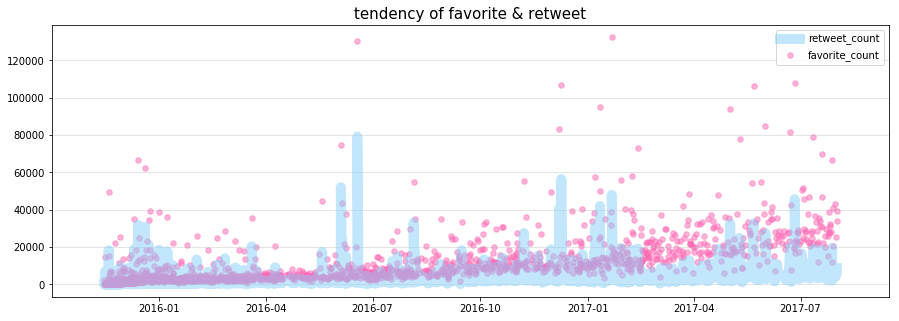

In [65]:
# 喜爱量、转发量随时间的变化

plt.figure(figsize=(15,5))

plt.scatter(pic.day,pic.favorite_count,color='hotpink',s=30,alpha=.5)
plt.plot(pic.day,pic.retweet_count,color='lightskyblue',linewidth=10,alpha=.5)

plt.title('tendency of favorite & retweet',fontsize = 15)
plt.legend(labels = ['retweet_count','favorite_count'], loc = 'best')
plt.grid(axis='y',alpha=0.4)

从图中看出, 2015.11-2016.09这段时间内, 喜爱量微微超过转发量, 而之后差距加大, 到了2017年以后, 喜爱量远远超过转发量.

#### 3. 比较受欢迎的品种有哪些,分别在哪些月份最受欢迎？（受欢迎：喜爱量，转发量；月份控制大小、颜色）

In [66]:
# 合并品种和月份
note = []
count=0
for i in pic.index:
    notes = pic.p1[i],pic.mon[i]
    note.append(notes)
count+=1

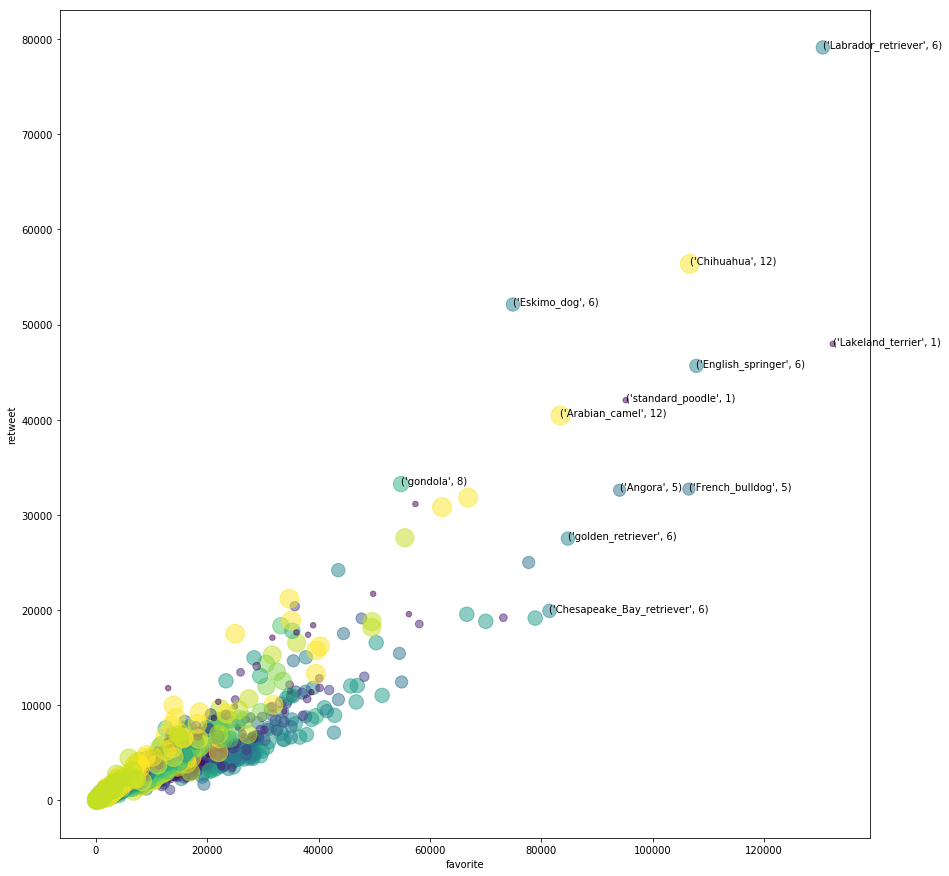

In [67]:
x = pic['favorite_count']
y = pic['retweet_count']

plt.scatter(x,y, c=pic['mon'],s=pic['mon']*30, alpha=0.5)

plt.xlabel("favorite")
plt.ylabel("retweet")

for i in x.index:
    if (x[i]>80000) or (y[i] > 32000): #数据的选取只是为了美观,没有其他特别的意义
        plt.annotate(note[i], xy = (x[i], y[i]), xytext = (x[i]+0.1, y[i]+0.1),size=10,alpha=1)
    
plt.subplots_adjust(right=2,top=3)
plt.show() 

#### 从散点图分布来看
Labrador_retriever, Chihuahua, Eskimo_dog, Lakeland_terrier,English_springer, Standard_poodle, Arabian_camal, French_bulldog, Angora, gondola这些品种的宠物狗比较受欢迎.

####  有趣的是: 
- 6月份, Labrador_retriever(拉布拉多寻回犬), Eskimo_dog(爱斯基摩犬), English_springer(英国史宾格犬)...相对较受欢迎;
- 12月份, Chihuahua(吉娃娃), Arabian_camal(阿拉伯灵缇犬)...相对较受欢迎;
- 1月份, Lakeland_terrier(湖畔梗犬),Standard_poodle(标准贵宾犬)...相对较受欢迎;
- 5月份,Angora(安哥鲁犬),French_bulldog(法国斗牛犬)...相对较受欢迎;

不同月份,受欢迎的宠物狗品种有所不同,这或许跟它们的生活习性有关.

#### 4. 哪些因素可能与评分有关？

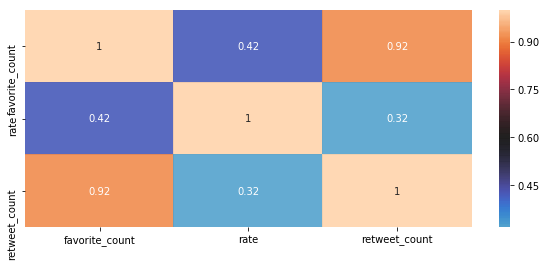

In [68]:
plt.figure(figsize=(10,4))

rate_pic = pic[['favorite_count','rate','retweet_count']].corr()
sns.heatmap(rate_pic,annot=True,center=0.6,alpha=0.9)

> 0.8-1.0 极强相关，0.6-0.8 强相关，0.4-0.6 中等程度相关，0.2-0.4 弱相关，0.0-0.2 极弱相关或无相关

喜爱量与转发量系数为0.91，强相关；
喜爱量与评分系数为0.41，中度相关；
转发量与评分系数为0.31，弱相关